In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import f1_score, accuracy_score, precision_recall_curve, precision_score, recall_score, auc, roc_curve, confusion_matrix
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)

In [2]:
#retrieve the data set to data frame
df = pd.read_csv('clean_dataset.csv')
df = df.sample(frac=1, random_state=0)
df

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
14,0,45.83,10.500,1,1,Materials,White,5.000,1,1,7,1,ByBirth,0,0,1
586,1,64.08,20.000,1,1,Utilities,Black,17.500,1,1,9,1,ByBirth,0,1000,1
140,0,31.25,3.750,1,1,InformationTechnology,Black,0.625,1,1,9,1,ByBirth,181,0,1
492,1,39.25,9.500,1,1,CommunicationServices,White,6.500,1,1,14,0,ByBirth,240,4607,1
350,0,26.17,2.000,1,1,Research,Other,0.000,0,0,0,1,ByBirth,276,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,0,36.75,4.710,1,1,Healthcare,Latino,0.000,0,0,0,0,ByBirth,160,0,0
192,1,41.75,0.960,1,1,Utilities,White,2.500,1,0,0,0,ByBirth,510,600,1
629,0,19.58,0.665,1,1,Industrials,White,1.665,0,0,0,0,ByBirth,220,5,0
559,0,22.83,2.290,1,1,Materials,Black,2.290,1,1,7,1,ByBirth,140,2384,1


In [3]:
#display the data information (data type, value, name)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 14 to 684
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 91.6+ KB


In [4]:
#sns.set(style="ticks", color_codes=True)
#g = sns.pairplot(df)

#plt.show()

In [5]:
df.isna().any()

Gender            False
Age               False
Debt              False
Married           False
BankCustomer      False
Industry          False
Ethnicity         False
YearsEmployed     False
PriorDefault      False
Employed          False
CreditScore       False
DriversLicense    False
Citizen           False
ZipCode           False
Income            False
Approved          False
dtype: bool

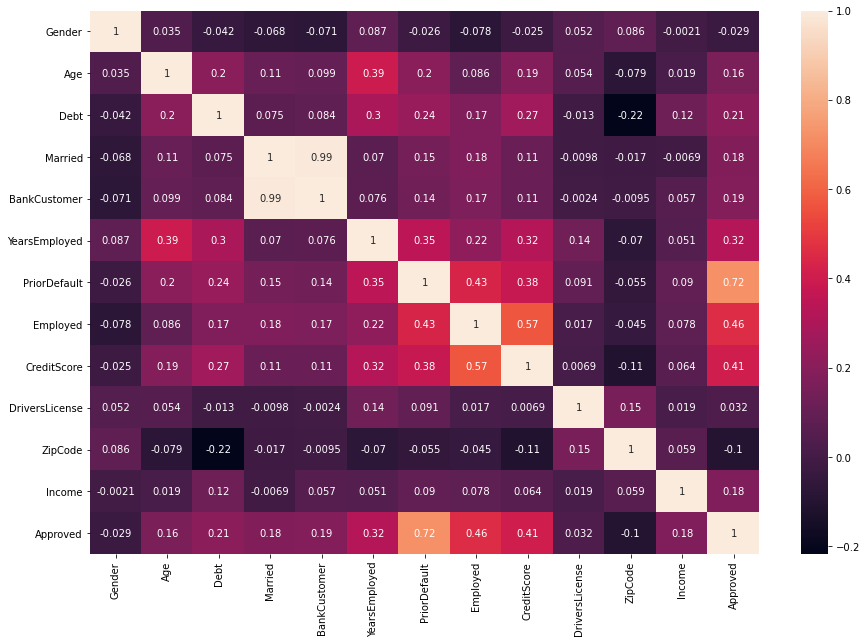

In [6]:
#heat map
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()
# PriorDefault show a strong correlation to the Approvedt

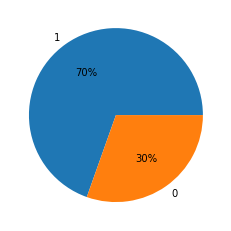

In [7]:
plt.pie(df['Gender'].value_counts(),autopct='%.f%%', labels=df['Gender'].value_counts().index);

# Male (1) & Female (0)

In [8]:
# change the data type of age from floating value to integer value
df['Age'] = df['Age'].astype(int)

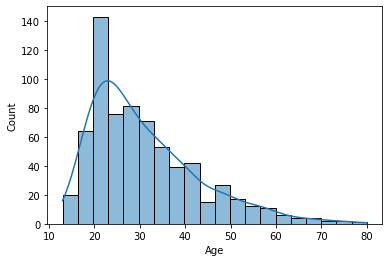

In [9]:
# Right Skewed Distribution

sns.histplot(df['Age'], kde=True);

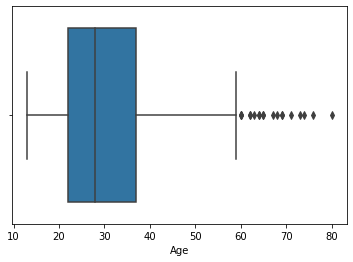

In [10]:
#boxplot for age column
sns.boxplot(df['Age']);

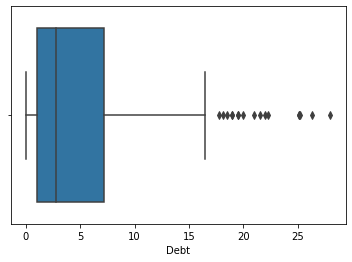

In [11]:
#boxplot for debt column
sns.boxplot(df['Debt']);

1    525
0    165
Name: Married, dtype: int64


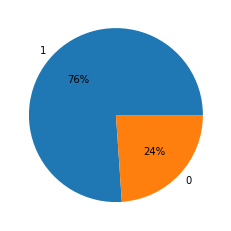

In [12]:
plt.pie(df['Married'].value_counts(),autopct='%.f%%', labels=df['Married'].value_counts().index);

print(df['Married'].value_counts())

# Most of them are married
# Married (1) & Non Married (0)

1    527
0    163
Name: BankCustomer, dtype: int64


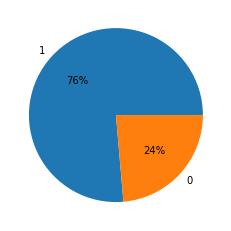

In [13]:
plt.pie(df['BankCustomer'].value_counts(),autopct='%.f%%', labels=df['BankCustomer'].value_counts().index);

print(df['BankCustomer'].value_counts())

# Most of them are bank customer
# Bank Customer (1) & Non Bank Customer (0)

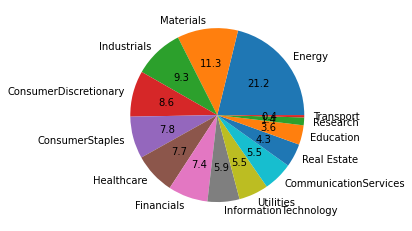

In [14]:
# pie chart for Industry
plt.pie(df['Industry'].value_counts(),autopct='%.1f',labels=df['Industry'].value_counts().index);

In [15]:
encoder = LabelEncoder().fit(df['Industry'])

df['Industry'] = encoder.transform(df['Industry'])

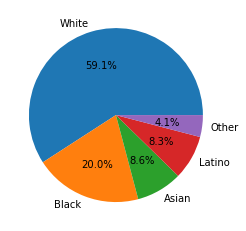

In [16]:
# pie chart for Ethnicity
plt.pie(df['Ethnicity'].value_counts(),autopct='%.1f%%',labels=df['Ethnicity'].value_counts().index);

In [17]:
encoder = LabelEncoder().fit(df['Ethnicity'])

df['Ethnicity'] = encoder.transform(df['Ethnicity'])


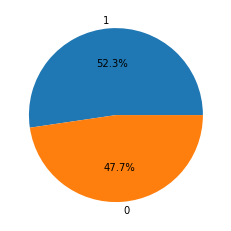

In [18]:
plt.pie(df['PriorDefault'].value_counts(),autopct='%.1f%%',labels=df['PriorDefault'].value_counts().index);
# pie chart of Prior Default
# more than 50% defaulted

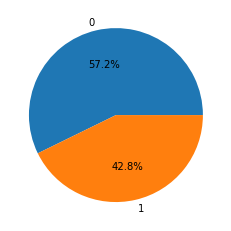

In [19]:
plt.pie(df['Employed'].value_counts(),autopct='%.1f%%',labels=df['Employed'].value_counts().index);
# Pie chart of Employed
# more than 50% are unemployed

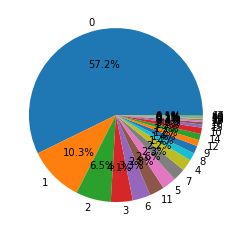

In [20]:
# pie chart of Credit Score
plt.pie(df['CreditScore'].value_counts(),autopct='%.1f%%',labels=df['CreditScore'].value_counts().index);

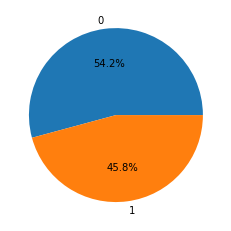

In [21]:
plt.pie(df['DriversLicense'].value_counts(),autopct='%.1f%%',labels=df['DriversLicense'].value_counts().index);

# pie chart of Drivers License
# more than 50% doesn't have driver license

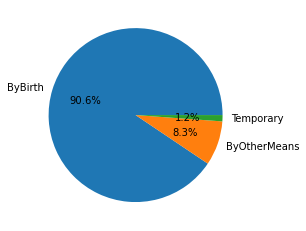

In [22]:
# pie chart of Citizen

plt.pie(df['Citizen'].value_counts(),autopct='%.1f%%',labels=df['Citizen'].value_counts().index);

In [23]:
encoder = LabelEncoder().fit(df['Citizen'])

df['Citizen'] = encoder.transform(df['Citizen'])

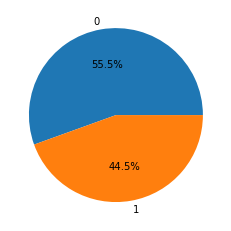

In [24]:
plt.pie(df['Approved'].value_counts(),autopct='%.1f%%',labels=df['Approved'].value_counts().index);

# pie chart of Approved
# more than 50% of them are not approved

In [25]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# this X will select all or the data except the last column of data which is the (Approval) column of data
# this y will select the last column of data which is the (Approval) column of data


In [26]:
# then it will split X & Y data set to both training and testing
# traning dataset will select the 80% fo data
# testing dataset will select the remaining 20% of data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)


In [27]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
pd.DataFrame(X_train_scaled, columns=df.columns[:15])

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
0,0.658609,0.673972,-0.620723,0.571772,0.568982,2.241500,0.770008,-0.623523,0.982045,1.161437,0.515040,1.079215,-0.318961,1.686370,-0.186458
1,0.658609,-0.671839,-0.844377,-1.748949,-1.757524,0.740277,-1.247608,-0.623523,-1.018283,-0.861002,-0.472806,-0.926599,-0.318961,0.326086,-0.186270
2,0.658609,-1.176518,-0.306613,0.571772,0.568982,-1.361435,0.770008,-0.558314,-1.018283,-0.861002,-0.472806,1.079215,-0.318961,-0.240699,-0.186081
3,-1.518351,-0.671839,-0.595873,0.571772,0.568982,1.641011,0.097469,-0.662337,-1.018283,1.161437,-0.275237,-0.926599,-0.318961,0.099372,-0.176467
4,-1.518351,-0.840065,1.358368,0.571772,0.568982,-0.160457,-1.247608,-0.635943,-1.018283,-0.861002,-0.472806,-0.926599,-0.318961,0.779514,-0.185516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,0.658609,-1.008291,-0.612771,-1.748949,-1.757524,-0.460701,0.770008,0.062722,-1.018283,-0.861002,-0.472806,1.079215,-0.318961,-0.399399,-0.185327
548,-1.518351,-0.083047,1.424967,0.571772,0.568982,-0.460701,0.770008,-0.041301,0.982045,1.161437,-0.275237,-0.926599,-0.318961,0.212729,-0.182876
549,0.658609,-0.335386,-0.314565,-1.748949,-1.757524,1.040521,-1.247608,0.916647,-1.018283,1.161437,-0.077668,1.079215,-0.318961,1.057239,-0.186270
550,-1.518351,-0.503612,-0.960678,0.571772,0.568982,-0.460701,0.770008,-0.662337,-1.018283,-0.861002,-0.472806,-0.926599,5.453711,-1.034198,-0.186458


In [29]:
pd.DataFrame(X_test_scaled, columns=df.columns[:15])

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
0,0.658609,-0.755952,-0.455716,-1.748949,-1.757524,-0.460701,-1.247608,0.140352,0.982045,-0.861002,-0.472806,-0.926599,-0.318961,-1.034198,-0.186458
1,0.658609,-0.251273,-0.886126,0.571772,0.568982,1.340766,0.770008,-0.390634,0.982045,-0.861002,-0.472806,1.079215,2.567375,4.225567,-0.186458
2,0.658609,-0.671839,-0.761874,0.571772,0.568982,-0.460701,0.770008,-0.403055,0.982045,-0.861002,-0.472806,-0.926599,2.567375,0.666157,-0.186458
3,0.658609,0.589859,-0.820521,0.571772,0.568982,-0.460701,0.770008,-0.545893,-1.018283,1.161437,-0.077668,-0.926599,-0.318961,0.241068,-0.092196
4,0.658609,0.085180,-0.662472,0.571772,0.568982,0.740277,-1.247608,1.045512,0.982045,1.161437,0.119901,1.079215,-0.318961,-1.034198,-0.186458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0.658609,-0.924178,-0.960678,0.571772,0.568982,1.340766,0.770008,-0.507078,-1.018283,-0.861002,-0.472806,-0.926599,-0.318961,-0.218027,-0.186458
134,0.658609,-0.251273,-0.836425,0.571772,0.568982,-0.160457,0.770008,-0.584708,-1.018283,-0.861002,-0.472806,-0.926599,-0.318961,1.119585,0.192477
135,0.658609,0.505746,-0.430866,0.571772,0.568982,0.740277,0.770008,-0.611102,-1.018283,-0.861002,-0.472806,1.079215,-0.318961,-1.034198,-0.092007
136,0.658609,1.599217,-0.844377,0.571772,0.568982,0.139788,-0.575069,-0.662337,-1.018283,-0.861002,-0.472806,-0.926599,-0.318961,-0.212360,-0.186458


In [30]:
#Logistic Regresion

In [31]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1)

logreg.fit(X_train_scaled, y_train)

y_pred_logreg = logreg.predict(X_test_scaled)

logreg_f1 = f1_score(y_test, y_pred_logreg)
logreg_precision = precision_score(y_test, y_pred_logreg)
logreg_recall = recall_score(y_test, y_pred_logreg)

print(f"f1 score using LogReg = {np.round(logreg_f1,4)}")
print(f"precision score using LogReg = {np.round(logreg_precision,4)}")
print(f"recall score using LogReg = {np.round(logreg_recall,4)}")
print('----------------------------')


f1 score using LogReg = 0.8676
precision score using LogReg = 0.831
recall score using LogReg = 0.9077
----------------------------


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_logreg,digits=4))

              precision    recall  f1-score   support

           0     0.9104    0.8356    0.8714        73
           1     0.8310    0.9077    0.8676        65

    accuracy                         0.8696       138
   macro avg     0.8707    0.8717    0.8695       138
weighted avg     0.8730    0.8696    0.8696       138



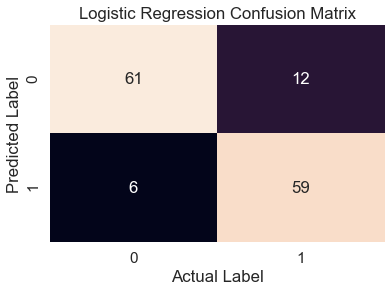

In [33]:
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=confusion_matrix(y_test, y_pred_logreg), cbar=False)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.title('Logistic Regression Confusion Matrix')

plt.show()

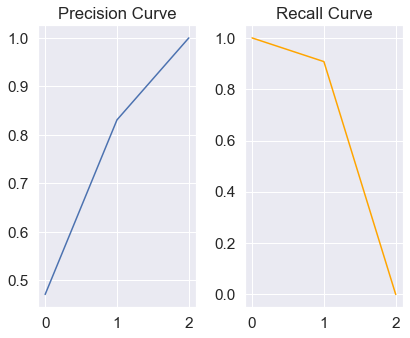

In [34]:
precision, recall, treshold = precision_recall_curve(y_test, y_pred_logreg)

fig,ax = plt.subplots(1,2, figsize=(6,5))
ax[0].plot(precision)
ax[0].set_title('Precision Curve')
ax[1].plot(recall, c='orange')
ax[1].set_title('Recall Curve')

plt.tight_layout()

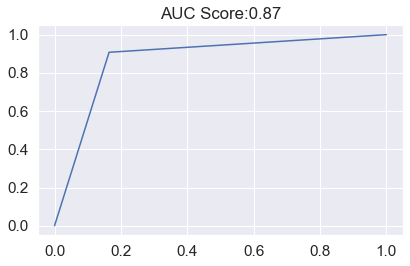

In [35]:
fpr, tpr, treshold2 = roc_curve(y_test, y_pred_logreg)

fig,ax = plt.subplots()
plt.plot(fpr,tpr)
plt.title('AUC Score:{}'.format(np.round(auc(fpr,tpr),2)))

plt.tight_layout()

In [36]:
logreg_inverse = pd.DataFrame(scaler.inverse_transform(X_test_scaled), columns=df.columns[:15])
logreg_inverse = logreg_inverse.drop('ZipCode',axis=1)
y_actual_logreg = pd.DataFrame(y_test, columns=['Actual'])
y_predict_logreg = pd.DataFrame(y_pred_logreg, columns=['Prediction'])

logreg_final =  pd.concat([logreg_inverse,y_actual_logreg,y_predict_logreg],axis=1)

print(f"miss prediction = {len(logreg_final[logreg_final['Actual'] != logreg_final['Prediction']])}")
logreg_final

miss prediction = 18


,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Actual,Prediction
0,1.0,22.0,2.540,0.0,0.0,4.0,1.0,2.585,1.0,0.0,0.0,0.0,0.0,0.0,1,1
1,1.0,28.0,0.375,1.0,1.0,10.0,4.0,0.875,1.0,0.0,0.0,1.0,1.0,0.0,0,1
2,1.0,23.0,1.000,1.0,1.0,4.0,4.0,0.835,1.0,0.0,0.0,0.0,1.0,0.0,1,1
3,1.0,38.0,0.705,1.0,1.0,4.0,4.0,0.375,0.0,1.0,2.0,0.0,0.0,500.0,0,0
4,1.0,32.0,1.500,1.0,1.0,8.0,1.0,5.500,1.0,1.0,3.0,1.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,1.0,20.0,0.000,1.0,1.0,10.0,4.0,0.500,0.0,0.0,0.0,0.0,0.0,0.0,0,0
134,1.0,28.0,0.625,1.0,1.0,5.0,4.0,0.250,0.0,0.0,0.0,0.0,0.0,2010.0,0,0
135,1.0,37.0,2.665,1.0,1.0,8.0,4.0,0.165,0.0,0.0,0.0,1.0,0.0,501.0,0,0
136,1.0,50.0,0.585,1.0,1.0,6.0,2.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [37]:
logreg_inverse = pd.DataFrame(scaler.inverse_transform(X_test_scaled), columns=df.columns[:15])
logreg_inverse = logreg_inverse.drop('ZipCode',axis=1)
y_actual_logreg = pd.DataFrame(y_test, columns=['Actual'])
y_predict_logreg = pd.DataFrame(y_pred_logreg, columns=['Prediction'])

logreg_final =  pd.concat([logreg_inverse,y_actual_logreg,y_predict_logreg],axis=1)

In [38]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict_logreg))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict_logreg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict_logreg)))

Mean Absolute Error: 0.13043478260869565
Mean Squared Error: 0.13043478260869565
Root Mean Squared Error: 0.3611575592573076


In [39]:
# SVM

In [40]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train_scaled, y_train)

y_pred_svc = svc.predict(X_test_scaled)


svc_f1 = f1_score(y_test, y_pred_svc)
svc_precision = precision_score(y_test, y_pred_svc)
svc_recall = recall_score(y_test, y_pred_svc)


print("USING SVC \n")
print(f"f1 score = {np.round(svc_f1,4)}")
print(f"precision score= {np.round(svc_precision,4)}")
print(f"recall score= {np.round(svc_recall,4)}")
print('----------------------------')


USING SVC 

f1 score = 0.8333
precision score= 0.8209
recall score= 0.8462
----------------------------


In [41]:
#Get accuracy value
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_svc,digits=4))

              precision    recall  f1-score   support

           0     0.8592    0.8356    0.8472        73
           1     0.8209    0.8462    0.8333        65

    accuracy                         0.8406       138
   macro avg     0.8400    0.8409    0.8403       138
weighted avg     0.8411    0.8406    0.8407       138



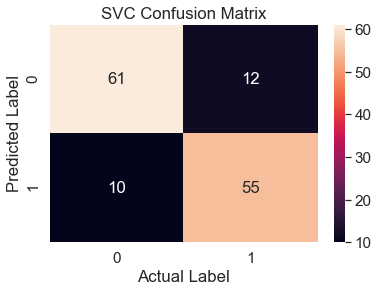

In [42]:
sns.set(font_scale=1.4)
svc_cm = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(svc_cm, annot=confusion_matrix(y_test, y_pred_svc))
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.title('SVC Confusion Matrix')

plt.show()

In [43]:
svc_FP = (svc_cm[1][0]).astype(float)
svc_TN = (svc_cm[0][0]).astype(float)

svc_FPR = svc_FP/(svc_FP+svc_TN)*100
print("False Positive Rate of SVC: " + str(round(svc_FPR,3))+"%")

False Positive Rate of SVC: 14.085%


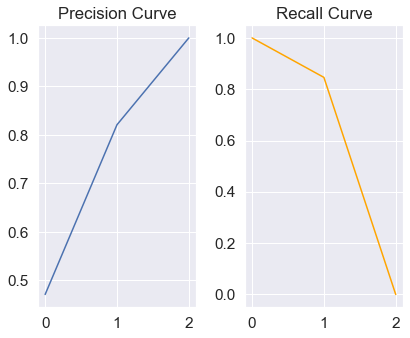

In [44]:
precision, recall, treshold = precision_recall_curve(y_test, y_pred_svc)

fig,ax = plt.subplots(1,2, figsize=(6,5))
ax[0].plot(precision)
ax[0].set_title('Precision Curve')
ax[1].plot(recall, c='orange')
ax[1].set_title('Recall Curve')

plt.tight_layout()

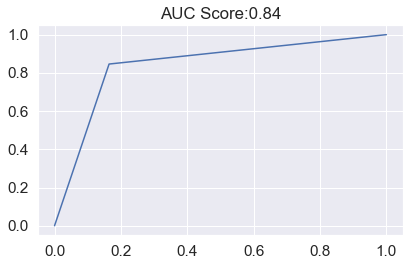

In [45]:
fpr2, tpr2, treshold2 = roc_curve(y_test, y_pred_svc)

fig,ax = plt.subplots()
plt.plot(fpr2,tpr2)
plt.title('AUC Score:{}'.format(np.round(auc(fpr2,tpr2),2)))

plt.tight_layout()

In [46]:
svc_inverse = pd.DataFrame(scaler.inverse_transform(X_test_scaled), columns=df.columns[:15])
svc_inverse = svc_inverse.drop('ZipCode',axis=1)
y_actual_svc = pd.DataFrame(y_test, columns=['Actual'])
y_predict_svc = pd.DataFrame(y_pred_svc, columns=['Prediction'])

svc_final =  pd.concat([svc_inverse,y_actual_svc,y_predict_svc],axis=1)

print(f"miss prediction = {len(svc_final[svc_final['Actual'] != svc_final['Prediction']])}")
svc_final

miss prediction = 22


,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Actual,Prediction
0,1.0,22.0,2.540,0.0,0.0,4.0,1.0,2.585,1.0,0.0,0.0,0.0,0.0,0.0,1,0
1,1.0,28.0,0.375,1.0,1.0,10.0,4.0,0.875,1.0,0.0,0.0,1.0,1.0,0.0,0,0
2,1.0,23.0,1.000,1.0,1.0,4.0,4.0,0.835,1.0,0.0,0.0,0.0,1.0,0.0,1,0
3,1.0,38.0,0.705,1.0,1.0,4.0,4.0,0.375,0.0,1.0,2.0,0.0,0.0,500.0,0,0
4,1.0,32.0,1.500,1.0,1.0,8.0,1.0,5.500,1.0,1.0,3.0,1.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,1.0,20.0,0.000,1.0,1.0,10.0,4.0,0.500,0.0,0.0,0.0,0.0,0.0,0.0,0,0
134,1.0,28.0,0.625,1.0,1.0,5.0,4.0,0.250,0.0,0.0,0.0,0.0,0.0,2010.0,0,0
135,1.0,37.0,2.665,1.0,1.0,8.0,4.0,0.165,0.0,0.0,0.0,1.0,0.0,501.0,0,0
136,1.0,50.0,0.585,1.0,1.0,6.0,2.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [47]:
# Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=3)

rfc.fit(X_train_scaled, y_train)

y_pred_rfc = rfc.predict(X_test_scaled)

rfc_f1 = f1_score(y_test, y_pred_rfc)
rfc_precision = precision_score(y_test, y_pred_rfc)
rfc_recall = recall_score(y_test, y_pred_rfc)


print(f"f1 score using rfc = {np.round(rfc_f1,4)}")
print(f"precision score using rfc = {np.round(rfc_precision,4)}")
print(f"recall score using rfc = {np.round(rfc_recall,4)}")
print('----------------------------')


f1 score using rfc = 0.8889
precision score using rfc = 0.918
recall score using rfc = 0.8615
----------------------------


In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rfc, digits=4))

              precision    recall  f1-score   support

           0     0.8831    0.9315    0.9067        73
           1     0.9180    0.8615    0.8889        65

    accuracy                         0.8986       138
   macro avg     0.9006    0.8965    0.8978       138
weighted avg     0.8996    0.8986    0.8983       138



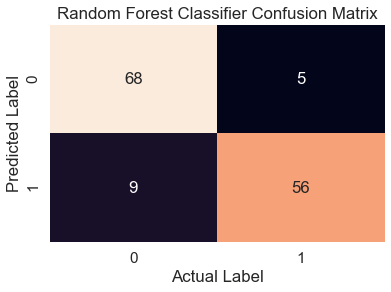

In [50]:
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(y_test, y_pred_rfc), annot=confusion_matrix(y_test, y_pred_rfc), cbar=False)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.title('Random Forest Classifier Confusion Matrix')

plt.show()

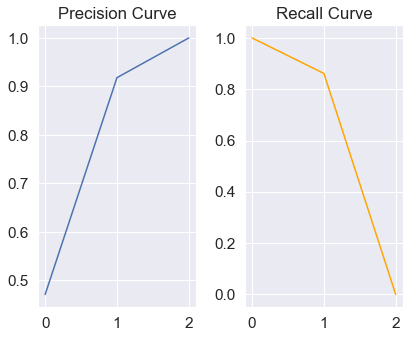

In [51]:
precision, recall, treshold = precision_recall_curve(y_test, y_pred_rfc)

fig,ax = plt.subplots(1,2, figsize=(6,5))
ax[0].plot(precision)
ax[0].set_title('Precision Curve')
ax[1].plot(recall, c='orange')
ax[1].set_title('Recall Curve')

plt.tight_layout()

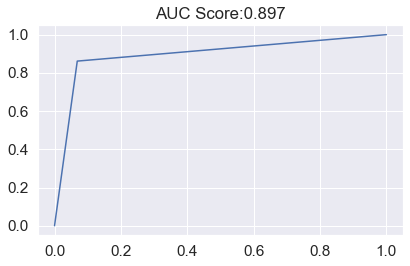

In [52]:
fpr3, tpr3, treshold2 = roc_curve(y_test, y_pred_rfc)

fig,ax = plt.subplots()
plt.plot(fpr3,tpr3)
plt.title('AUC Score:{}'.format(np.round(auc(fpr3,tpr3),3)))

plt.tight_layout()

In [53]:
rfc_inverse = pd.DataFrame(scaler.inverse_transform(X_test_scaled), columns=df.columns[:15])
rfc_inverse = rfc_inverse.drop('ZipCode',axis=1)
y_actual_rfc = pd.DataFrame(y_test, columns=['Actual'])
y_predict_rfc = pd.DataFrame(y_pred_rfc, columns=['Prediction'])

rfc_final =  pd.concat([rfc_inverse,y_actual_rfc,y_predict_rfc],axis=1)

print(f"miss prediction = {len(rfc_final[rfc_final['Actual'] != rfc_final['Prediction']])} over {len(rfc_final)} items")
rfc_final

miss prediction = 14 over 138 items


,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Actual,Prediction
0,1.0,22.0,2.540,0.0,0.0,4.0,1.0,2.585,1.0,0.0,0.0,0.0,0.0,0.0,1,0
1,1.0,28.0,0.375,1.0,1.0,10.0,4.0,0.875,1.0,0.0,0.0,1.0,1.0,0.0,0,0
2,1.0,23.0,1.000,1.0,1.0,4.0,4.0,0.835,1.0,0.0,0.0,0.0,1.0,0.0,1,0
3,1.0,38.0,0.705,1.0,1.0,4.0,4.0,0.375,0.0,1.0,2.0,0.0,0.0,500.0,0,0
4,1.0,32.0,1.500,1.0,1.0,8.0,1.0,5.500,1.0,1.0,3.0,1.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,1.0,20.0,0.000,1.0,1.0,10.0,4.0,0.500,0.0,0.0,0.0,0.0,0.0,0.0,0,0
134,1.0,28.0,0.625,1.0,1.0,5.0,4.0,0.250,0.0,0.0,0.0,0.0,0.0,2010.0,0,0
135,1.0,37.0,2.665,1.0,1.0,8.0,4.0,0.165,0.0,0.0,0.0,1.0,0.0,501.0,0,0
136,1.0,50.0,0.585,1.0,1.0,6.0,2.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [54]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict_rfc))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict_rfc))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict_rfc)))

Mean Absolute Error: 0.10144927536231885
Mean Squared Error: 0.10144927536231885
Root Mean Squared Error: 0.31851102863530306


In [55]:
name = ['Logistic Regression', 'Support Vector Machine','Random Forest']
f1_all = [(al) for al in [logreg_f1, svc_f1, rfc_f1]]
precision_all = [(al) for al in [logreg_precision, svc_precision, rfc_precision]]
recall_all = [(al) for al in [logreg_recall, svc_recall, rfc_recall]]

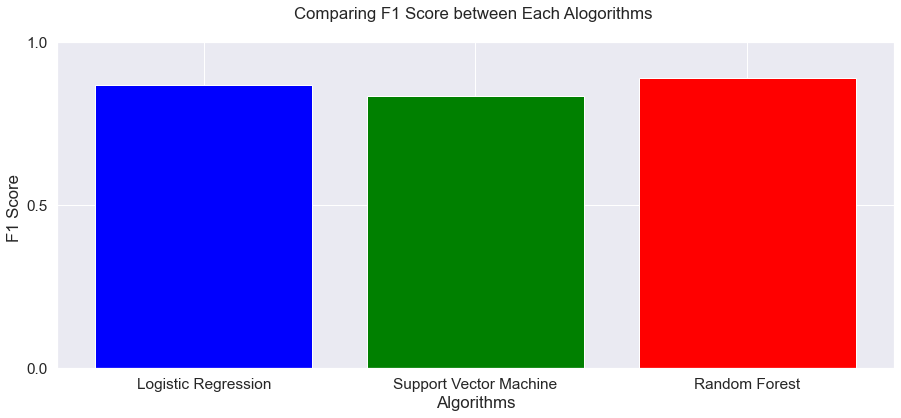

[86.76 83.33 88.89]


In [56]:
plt.figure(figsize=(15,6))
plt.grid(True)
plt.bar(x=name, height= f1_all, color=['blue','green', 'red'])
plt.xticks()
plt.ylim((0,1))
plt.yticks(np.arange(0,1.5,0.5))
plt.title("Comparing F1 Score between Each Alogorithms \n")
plt.ylabel("F1 Score ")
plt.xlabel("Algorithms")
plt.show()
print(np.round(f1_all,4)*100)


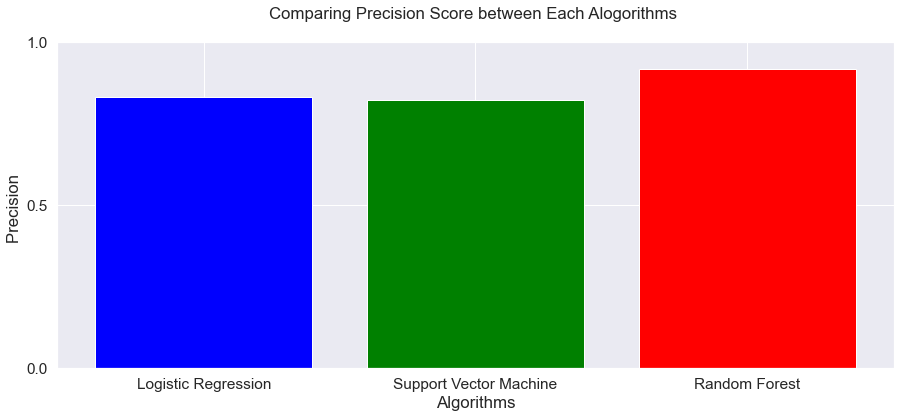

[83.1  82.09 91.8 ]


In [57]:
plt.figure(figsize=(15,6))
plt.grid(True)
plt.bar(x=name, height= precision_all, color=['blue','green', 'red'])
plt.xticks()
plt.ylim((0,1))
plt.yticks(np.arange(0,1.5,0.5))
plt.title("Comparing Precision Score between Each Alogorithms \n")
plt.ylabel("Precision ")
plt.xlabel("Algorithms")
plt.show()
print(np.round(precision_all,4)*100)


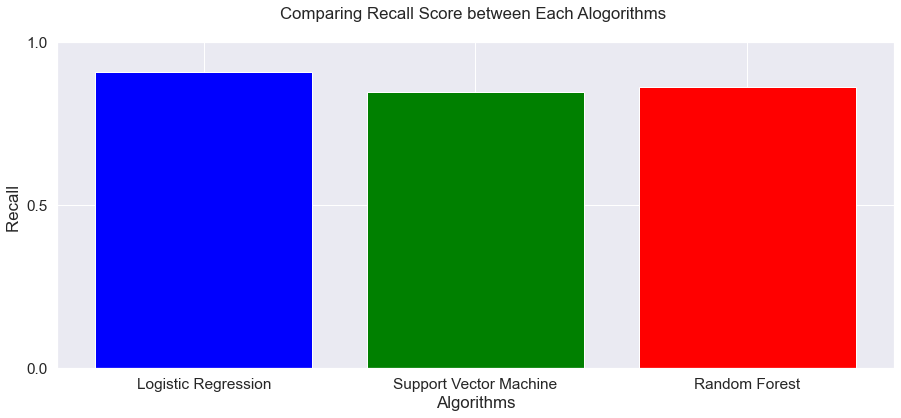

[90.77 84.62 86.15]


In [58]:
plt.figure(figsize=(15,6))
plt.grid(True)
plt.bar(x=name, height= recall_all, color=['blue','green', 'red'])
plt.xticks()
plt.ylim((0,1))
plt.yticks(np.arange(0,1.5,0.5))
plt.title("Comparing Recall Score between Each Alogorithms \n")
plt.ylabel("Recall ")
plt.xlabel("Algorithms")
plt.show()
print(np.round(recall_all,4)*100)


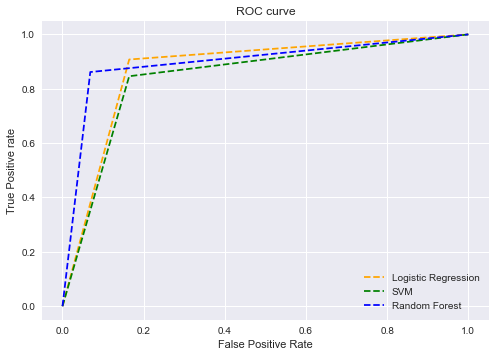

In [59]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='SVM')
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='Random Forest')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();